In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import squarify  # Per creare la treemap
import seaborn as sns
from math import pi

dati = pd.read_excel('archive/milano_housing_02_2_23.xlsx')

# GRAFICO A TORTA CLASSI ENERGETICHE

C:\Users\gabri\AppData\Local\Temp/ipykernel_24896/536485272.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selezionato['energy_efficiency'] = df_selezionato['energy_efficiency'].astype(str)
C:\Users\gabri\AppData\Local\Temp/ipykernel_24896/536485272.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selezionato['classe_energetica'] = df_selezionato['energy_efficiency'].apply(estrai_prima_lettera)


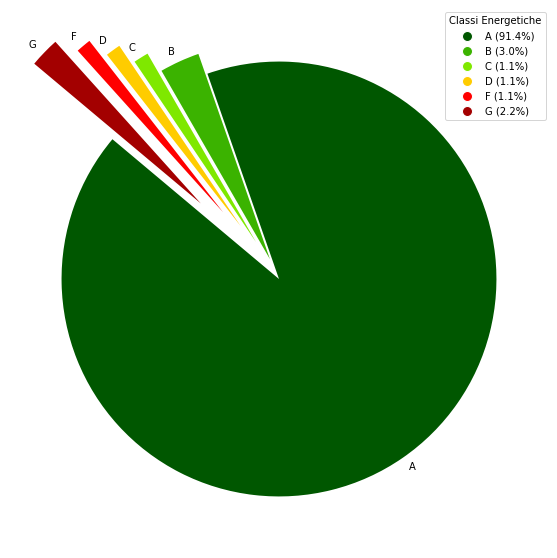

In [19]:
df_selezionato = dati[dati['year_of_build'] >= 2018]
def estrai_prima_lettera(efficienza):
    prima_lettera = efficienza[0].upper()
    return prima_lettera


df_selezionato['energy_efficiency'] = df_selezionato['energy_efficiency'].astype(str)
df_selezionato['classe_energetica'] = df_selezionato['energy_efficiency'].apply(estrai_prima_lettera)


ordine_indici = ["A", "B", "C", "D", "F", "G"]
colori_legenda = ['#005700', '#3bb300', '#7fe800', '#ffcc00', '#ff0000', '#a30000']


frequenze_assolute = df_selezionato['classe_energetica'].value_counts().reindex(ordine_indici, fill_value=0)
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5) 


totali = frequenze_assolute.sum()
percentuali = (frequenze_assolute / totali) * 100


etichette_legenda = [f"{etichetta} ({percentuale:.1f}%)"
                     for etichetta, percentuale in zip(ordine_indici, percentuali)]


legenda_personalizzata = [Line2D([0], [0], marker='o', color='w', label=etichetta,
                                  markerfacecolor=colore, markersize=10)
                          for colore, etichetta in zip(colori_legenda, etichette_legenda)]

plt.figure(figsize=(10, 10))
plt.pie(frequenze_assolute, explode=explode, labels=ordine_indici, startangle=140, colors=colori_legenda, labeldistance=1.05) 
plt.legend(handles=legenda_personalizzata, title='Classi Energetiche', loc='upper right')
plt.show()

# CONCENTRAZIONE CLASSI ENERGETICHE TOP 3 QUARTIERI PER NUMERO DI ANNUNCI

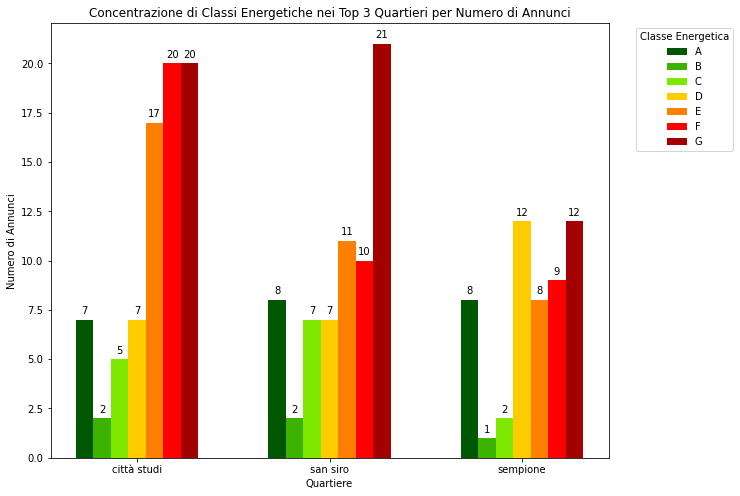

In [43]:

dati['energy_class'] = dati['energy_efficiency'].str.extract(r'(\w)')[0].str.upper()
top_3_quartieri = dati['neighborhood'].value_counts().head(3).index
dati_top_3 = dati[dati['neighborhood'].isin(top_3_quartieri)]

conteggi_energetici = dati_top_3.groupby(['neighborhood', 'energy_class']).size().unstack(fill_value=0)

colori_classi_energetiche = ['#005700', '#3bb300', '#7fe800', '#ffcc00', '#ff8000', '#ff0000', '#a30000']

fig, ax = plt.subplots(figsize=(10, 8))


bar_width = 0.1
indices = np.arange(len(conteggi_energetici)) * (1 + bar_width)

for i, classe in enumerate(conteggi_energetici.columns):
    ax.bar(indices + i * bar_width, conteggi_energetici[classe], width=bar_width, label=classe,
           color=colori_classi_energetiche[i])

for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.7, str(round(i.get_height(), 2)),
            ha='center', va='top')

ax.set_xticks(indices + bar_width * 7/2 - bar_width / 2)
ax.set_xticklabels(conteggi_energetici.index)
ax.legend(title='Classe Energetica', bbox_to_anchor=(1.04, 1), loc='upper left')
ax.set_xlabel('Quartiere')
ax.set_ylabel('Numero di Annunci')

plt.title('Concentrazione di Classi Energetiche nei Top 3 Quartieri per Numero di Annunci')
plt.show()

# NUMERO DI ANNUNCI PER CLASSE ENERGETICA

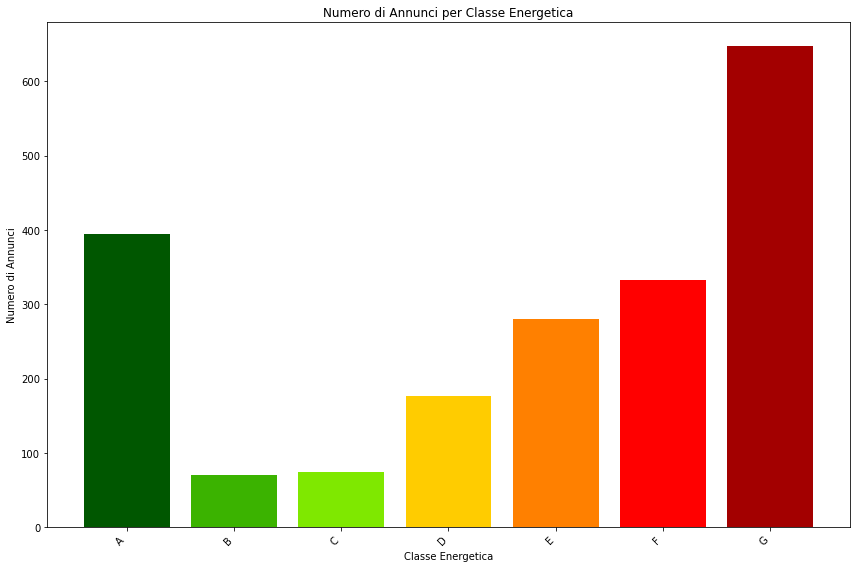

In [44]:

num_annunci_per_classe = dati.groupby('energy_class')['energy_class'].count().reset_index(name='numero_annunci')

plt.figure(figsize=(12, 8))
plt.bar(num_annunci_per_classe['energy_class'], num_annunci_per_classe['numero_annunci'], color=colori_classi_energetiche)
plt.title('Numero di Annunci per Classe Energetica')
plt.xlabel('Classe Energetica')
plt.ylabel('Numero di Annunci')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# COSTO MEDIO DELLE CASE PER CLASSE ENERGETICA

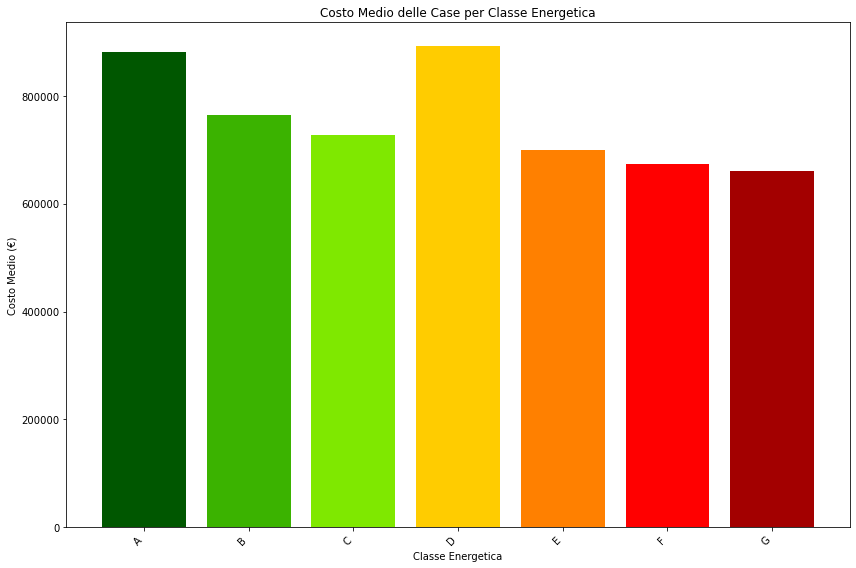

In [46]:

costo_medio_per_classe = dati.groupby('energy_class')['price'].mean().reset_index(name='costo_medio')

plt.figure(figsize=(12, 8))
plt.bar(costo_medio_per_classe['energy_class'], costo_medio_per_classe['costo_medio'], color=colori_classi_energetiche)
plt.title('Costo Medio delle Case per Classe Energetica')
plt.xlabel('Classe Energetica')
plt.ylabel('Costo Medio (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# TOP 10 QUARTIERI PER NUMERO DI ANNUNCI

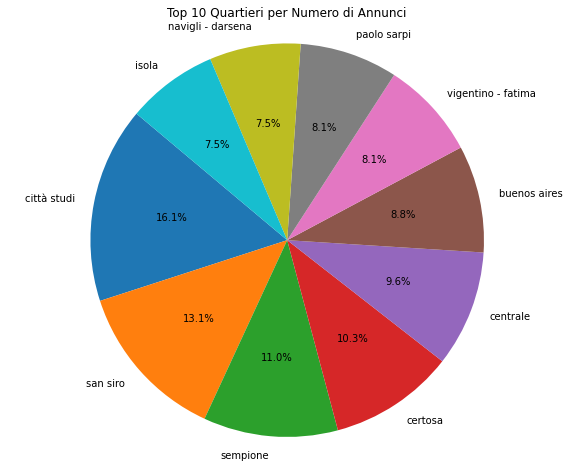

In [30]:

num_annunci_per_quartiere = dati.groupby('neighborhood')['index'].count().reset_index(name='numero_annunci')

quartieri_top10_annunci = num_annunci_per_quartiere.sort_values(by='numero_annunci', ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.pie(quartieri_top10_annunci['numero_annunci'], labels=quartieri_top10_annunci['neighborhood'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Quartieri per Numero di Annunci')
plt.axis('equal')
plt.show()

# COSTO MEDIO AL METRO QUADRO TOP 10 QUARTIERI PER NUMERO DI ANNUNCI

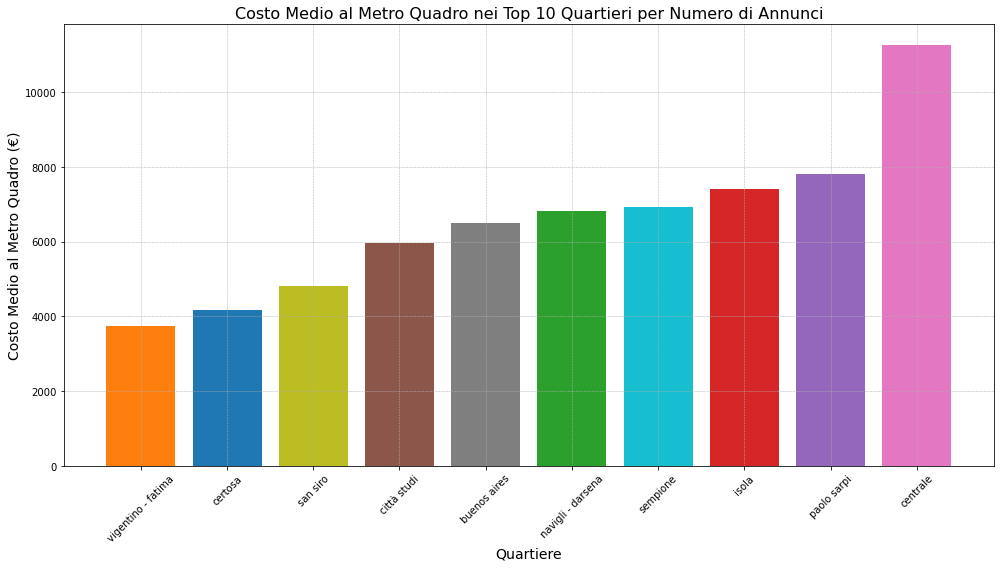

In [4]:

dati['costo_per_m2'] = dati['price'] / dati['m2']

top_quartieri = dati['neighborhood'].value_counts().head(10).index
data_top_quartieri = dati[dati['neighborhood'].isin(top_quartieri)]

costo_medio_mq_top_quartieri = data_top_quartieri.groupby('neighborhood')['costo_per_m2'].mean().sort_values()

colori_quartieri = {
    'CITTÀ STUDI': '#8c564b',
    'SAN SIRO': '#bcbd22',
    'SEMPIONE': '#17becf',
    'CERTOSA': '#1f77b4',
    'CENTRALE': '#e377c2',
    'BUENOS AIRES': '#7f7f7f',
    'PAOLO SARPI': '#9467bd',
    'VIGENTINO - FATIMA': '#ff7f0e',
    'NAVIGLI - DARSENA': '#2ca02c',
    'ISOLA': '#d62728'
}

colori_per_quartiere = [colori_quartieri[quartiere.upper()] for quartiere in costo_medio_mq_top_quartieri.index.str.upper()]

plt.figure(figsize=(14, 8))
plt.bar(costo_medio_mq_top_quartieri.index, costo_medio_mq_top_quartieri, color=colori_per_quartiere)
plt.title('Costo Medio al Metro Quadro nei Top 10 Quartieri per Numero di Annunci', fontsize=16)
plt.xlabel('Quartiere', fontsize=14)
plt.ylabel('Costo Medio al Metro Quadro (€)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=0)

plt.show()

# DISTRIBUZIONE TIPOLOGIE DI CASE

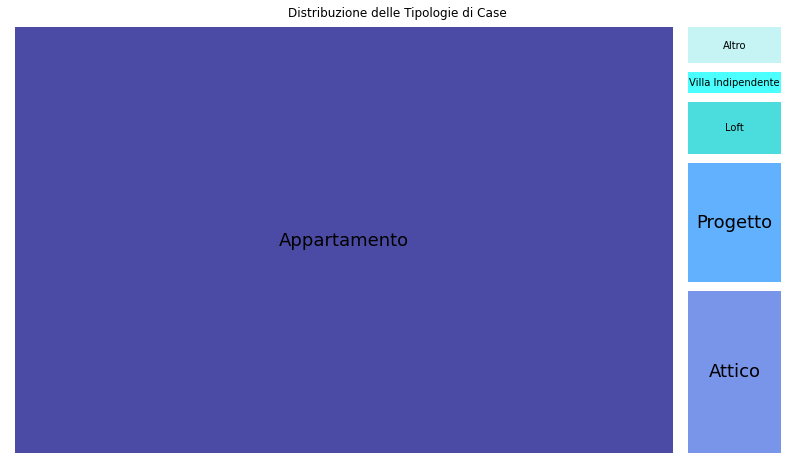

Appartamento          1824
Attico                 115
Progetto                86
Loft                    41
Villa Indipendente      20
Altro                   30
Name: typology_it, dtype: int64


In [7]:


traduzioni = {
    'apartment': 'Appartamento',
    'attic': 'Attico',
    'project': 'Progetto',
    'lofts': 'Loft',
    'palace - building': 'Palazzo',
    'detached villa': 'Villa Indipendente',
    'terraced house': 'Casa a Schiera',
    'open space': 'Open Space',
    'detached house': 'Casa Indipendente',
    'apartment in villa': 'Appartamento in Villa',
    'multi-family townhouse': 'Casa Multifamiliare',
    'semi-detached villa': 'Villa Bifamiliare',
    'multi-family villa': 'Villa Multifamiliare'
}
tipologie_case = dati[dati['typology'].notna()]

def estrai_prima_parte(stringa):
    if isinstance(stringa, str):  
        parte_divisa = stringa.split('|')
        if len(parte_divisa) > 0:
            prima_parte = parte_divisa[0].rstrip() 
            return prima_parte
    return str(stringa)

nuova_serie = tipologie_case['typology'].apply(estrai_prima_parte)

dati['typology_it'] = nuova_serie.map(traduzioni)

conteggi_tipologie = dati['typology_it'].value_counts()
conteggi_tipologie['Altro'] = conteggi_tipologie[conteggi_tipologie < 10].sum()
conteggi_tipologie = conteggi_tipologie[conteggi_tipologie >= 10]

colori_tipologie = ['#000080', '#4169E1', '#1E90FF', '#00CED1', '#00FFFF', '#AEEEEE', 'dodgerblue', 'seagreen', 'salmon', 'lightcoral', 'khaki', 'mediumorchid']

# Generazione della treemap
plt.figure(figsize=(14, 8))
squarify.plot(sizes=conteggi_tipologie.values, label=conteggi_tipologie.index, alpha=0.7, pad=True, color=colori_tipologie)
plt.axis('off')
plt.title('Distribuzione delle Tipologie di Case')
i = 0;
for label in plt.gca().get_children():
    if i == 3:
        continue
    if isinstance(label, plt.Text):
        i+=1
        label.set_fontsize(18)
plt.show()
print(conteggi_tipologie)


# DISTRIBUZIONE DEL COSTO MEDIO DELLE CASE TOP4 TIPOLOGIE

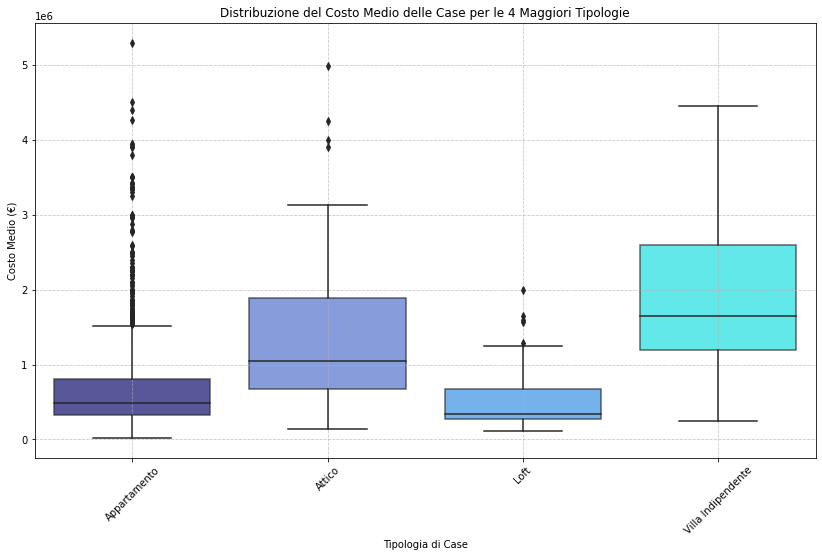

In [8]:


top4_tipologie = conteggi_tipologie.head(5).index.difference(['Progetto'])
dati_top4_tipologie = dati[dati['typology_it'].isin(top4_tipologie)]
colori_tipologie2 = ['#000080', '#4169E1', '#1E90FF', '#00FFFF']
plt.figure(figsize=(14, 8))
sns.boxplot(x='typology_it', y='price', data=dati_top4_tipologie, palette=colori_tipologie2, boxprops=dict(alpha=0.7))
plt.title('Distribuzione del Costo Medio delle Case per le 4 Maggiori Tipologie')
plt.xlabel('Tipologia di Case')
plt.ylabel('Costo Medio (€)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



# DISTRIBUZIONE COSTI CASE CITTA STUDI

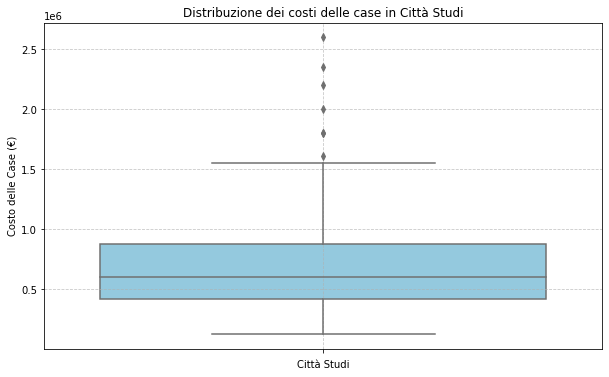

In [13]:

dati_citta_studi = dati[dati['neighborhood'] == 'città studi']

plt.figure(figsize=(10, 6))
sns.boxplot(y='price', data=dati_citta_studi, color='skyblue')
plt.title('Distribuzione dei costi delle case in Città Studi')
plt.xlabel('Città Studi')
plt.ylabel('Costo delle Case (€)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



# PREZZO MEDIO PER TIPO DI ANNUNCIO IN CITTA STUDI

C:\Users\gabri\AppData\Local\Temp/ipykernel_24896/2424407083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_citta_studi['rooms'] = pd.to_numeric(df_citta_studi['rooms'], errors='coerce').fillna(0).astype(int)
C:\Users\gabri\AppData\Local\Temp/ipykernel_24896/2424407083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Tipo'] = df_filtered['rooms'].map(room_map)


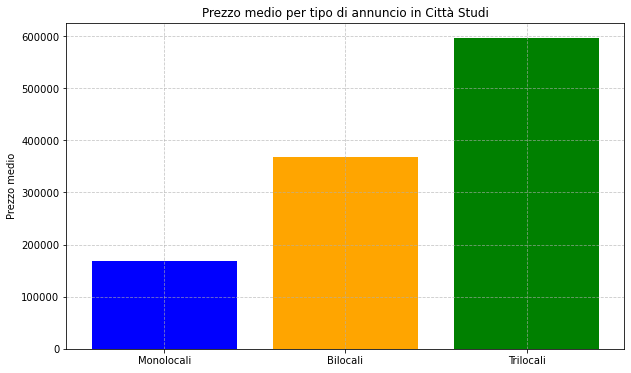

In [14]:

df_citta_studi = dati[dati['neighborhood'] == 'città studi']
df_citta_studi['rooms'] = pd.to_numeric(df_citta_studi['rooms'], errors='coerce').fillna(0).astype(int)
df_filtered = df_citta_studi[df_citta_studi['rooms'].isin([1, 2, 3])]

room_map = {1: 'Monolocali', 2: 'Bilocali', 3: 'Trilocali'}
df_filtered['Tipo'] = df_filtered['rooms'].map(room_map)

avg_price_per_type = df_filtered.groupby('Tipo')['price'].mean().reset_index()

avg_price_per_type = avg_price_per_type.sort_values(by='price')

plt.figure(figsize=(10, 6))
plt.bar(avg_price_per_type['Tipo'], avg_price_per_type['price'], color=['blue', 'orange', 'green'])
plt.title('Prezzo medio per tipo di annuncio in Città Studi')
plt.ylabel('Prezzo medio')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


# ANDAMENTO TEMPORALE COSTO MEDIO CASE RISPETTO ANNO DI COSTRUZIONE

    year_of_build         price
0          1900.0  9.783646e+05
1          1902.0  5.000000e+05
2          1904.0  3.128333e+06
3          1905.0  7.900000e+05
4          1907.0  7.712500e+05
..            ...           ...
88         2021.0  5.593094e+05
89         2022.0  7.588661e+05
90         2023.0  8.513627e+05
91         2024.0  1.197967e+06
92         2025.0  4.593571e+05

[93 rows x 2 columns]


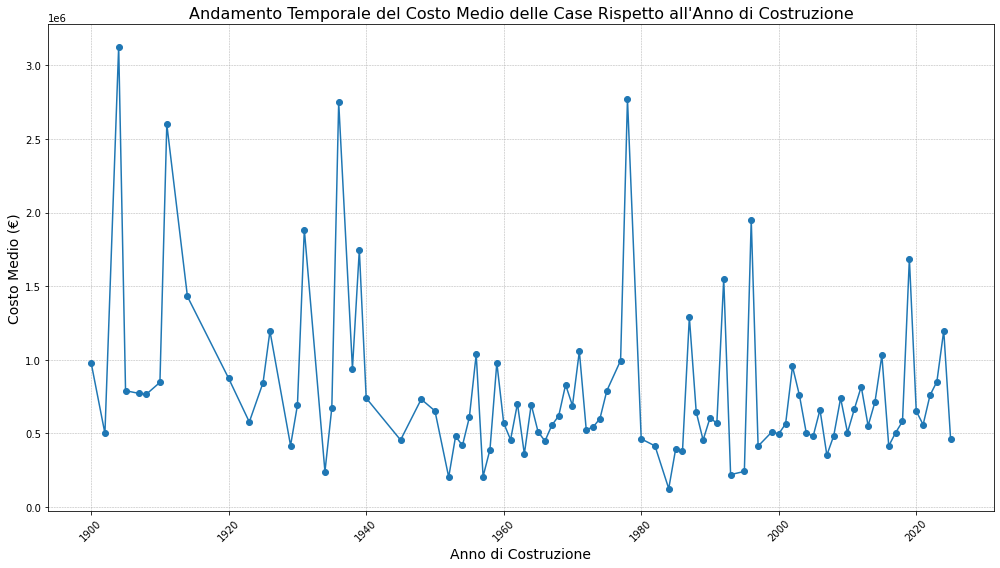

In [15]:

dati_clean = dati.dropna(subset=['year_of_build', 'price'])
dati_clean = dati_clean[dati_clean['year_of_build'] >= 1900]

media_prezzi_per_anno = dati_clean.groupby('year_of_build')['price'].mean().reset_index()
print(media_prezzi_per_anno)

plt.figure(figsize=(14, 8))
plt.plot(media_prezzi_per_anno['year_of_build'], media_prezzi_per_anno['price'], marker='o', linestyle='-')
plt.title('Andamento Temporale del Costo Medio delle Case Rispetto all\'Anno di Costruzione', fontsize=16)
plt.xlabel('Anno di Costruzione', fontsize=14)
plt.ylabel('Costo Medio (€)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


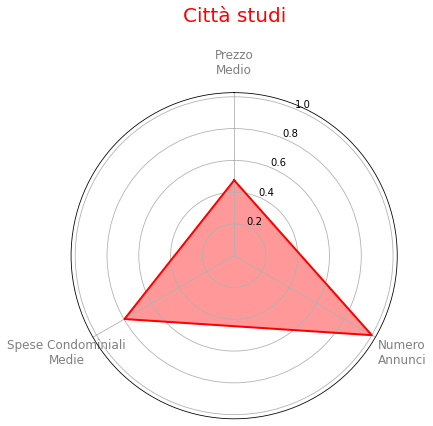

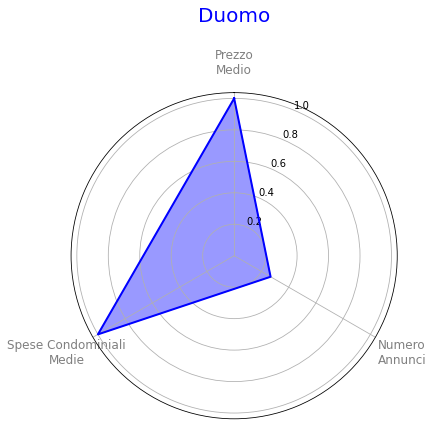

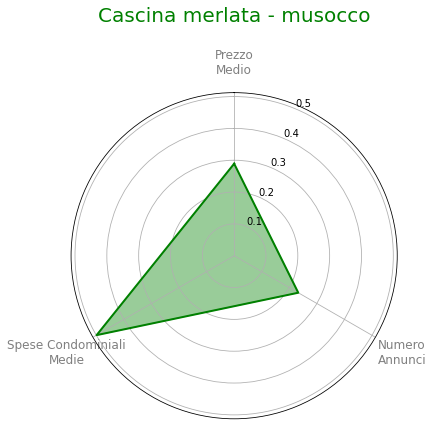

In [49]:
dati['price_per_m2'] = dati['price'] / dati['m2']

quartieri_interesse = ['città studi', 'duomo', 'cascina merlata - musocco']
metriche_quartieri = pd.DataFrame(columns=['Quartiere', 'Prezzo Medio', 'Numero Annunci', 'Spese Condominiali Medie'])

for quartiere in quartieri_interesse:
    quartiere_data = dati[dati['neighborhood'].str.lower() == quartiere]
    prezzo_medio = quartiere_data['price_per_m2'].mean()
    numero_annunci = len(quartiere_data)
    spese_condominiali_medie = quartiere_data['condominium_expenses'].mean()
    
    metriche_quartieri = metriche_quartieri.append({
        'Quartiere': quartiere,
        'Prezzo Medio': prezzo_medio,
        'Numero Annunci': numero_annunci,
        'Spese Condominiali Medie': spese_condominiali_medie
    }, ignore_index=True)

metriche_normalizzate = metriche_quartieri.copy()
for colonna in ['Prezzo Medio', 'Numero Annunci', 'Spese Condominiali Medie']:
    max_val = metriche_normalizzate[colonna].max()
    metriche_normalizzate[colonna] = metriche_normalizzate[colonna] / max_val

num_vars = len(metriche_normalizzate.columns) - 1
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

def crea_grafico_radar_aggiornato_distanza(quartiere, color):
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    values = metriche_normalizzate[metriche_normalizzate['Quartiere'].str.lower() == quartiere.lower()].iloc[0, 1:].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid', label=quartiere)
    ax.fill(angles, values, color=color, alpha=0.4)

    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    labels_aggiornati = ['Prezzo\nMedio', 'Numero\nAnnunci', 'Spese Condominiali\nMedie']
    plt.xticks(angles[:-1], labels_aggiornati, color='grey', size=12)

    ax.tick_params(axis='x', which='major', pad=20)
    ax.grid(True)
    plt.title(quartiere.capitalize(), size=20, color=color, y=1.2)

for quartiere, color in zip(quartieri_interesse, ['red', 'blue', 'green']):
    crea_grafico_radar_aggiornato_distanza(quartiere, color)

plt.show()


# DISTRIBUZIONE DIMENSIONI PROPRIETA IN CITTA STUDI

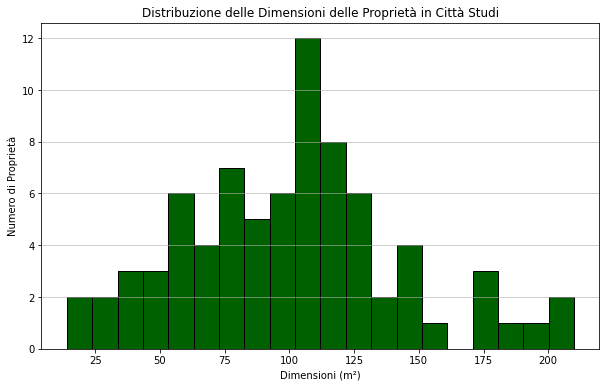

In [28]:

citta_studi_data = dati[dati['neighborhood'].str.lower() == 'città studi']

citta_studi_data = citta_studi_data[pd.to_numeric(citta_studi_data['m2'], errors='coerce').notnull()]
citta_studi_data['m2'] = pd.to_numeric(citta_studi_data['m2'])
Q1 = citta_studi_data['m2'].quantile(0.25)
Q3 = citta_studi_data['m2'].quantile(0.75)
IQR = Q3 - Q1
filtro = (citta_studi_data['m2'] >= Q1 - 1.5 * IQR) & (citta_studi_data['m2'] <= Q3 + 1.5 * IQR)
citta_studi_filtrato = citta_studi_data.loc[filtro]

plt.figure(figsize=(10, 6))
plt.hist(citta_studi_filtrato['m2'], bins=20, color='#006100', edgecolor='black')
plt.title('Distribuzione delle Dimensioni delle Proprietà in Città Studi')
plt.xlabel('Dimensioni (m²)')
plt.ylabel('Numero di Proprietà')
plt.grid(axis='y', alpha=0.75)
plt.show()


# TOP 10 QUARTIERI ECONOMICI E COSTOSI 

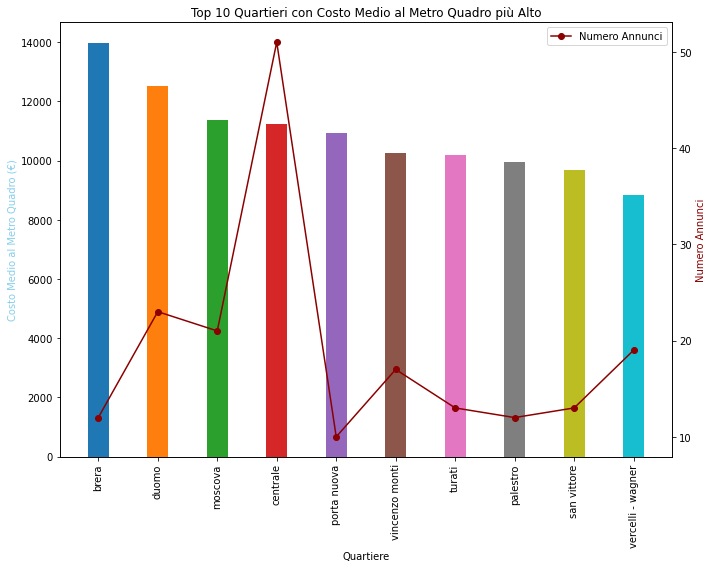

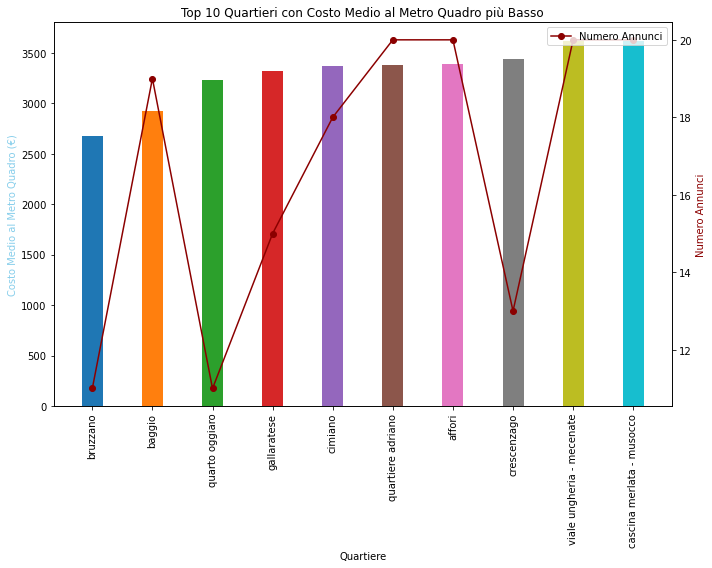

In [32]:
dati['costo_medio_mq'] = dati['price'] / dati['m2']
quartieri_stats = dati.groupby('neighborhood').agg(
    costo_medio_mq=('costo_medio_mq', 'mean'),
    numero_annunci=('neighborhood', 'count')
).reset_index()


quartieri_stats = quartieri_stats[quartieri_stats['numero_annunci'] >= 10]

top10_costosi = quartieri_stats.sort_values(by='costo_medio_mq', ascending=False).head(10)
top10_economici = quartieri_stats.sort_values(by='costo_medio_mq', ascending=True).head(10)

def crea_grafico(quartieri, titolo):
    ind = np.arange(len(quartieri))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(10, 8))
    colors = plt.cm.tab10(np.linspace(0, 1, 10))
    bars = ax1.bar(ind, quartieri['costo_medio_mq'], width, color=colors)

    ax2 = ax1.twinx()
    lines = ax2.plot(ind, quartieri['numero_annunci'], label='Numero Annunci', color='darkred', marker='o', linestyle='-')

    ax1.set_xlabel('Quartiere')
    ax1.set_ylabel('Costo Medio al Metro Quadro (€)', color='skyblue')
    ax2.set_ylabel('Numero Annunci', color='darkred')
    ax1.set_title(titolo)
    ax1.set_xticks(ind)
    ax1.set_xticklabels(quartieri['neighborhood'], rotation='vertical')
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.tight_layout()

crea_grafico(top10_costosi, 'Top 10 Quartieri piú costosi di Milano con almeno 10 annunci')
crea_grafico(top10_economici, 'Top 10 Quartieri piú economici di Milano con almeno 10 annunci')

plt.show()


# SPESE CONDOMINIALI TOP 10 QUARTIERI 

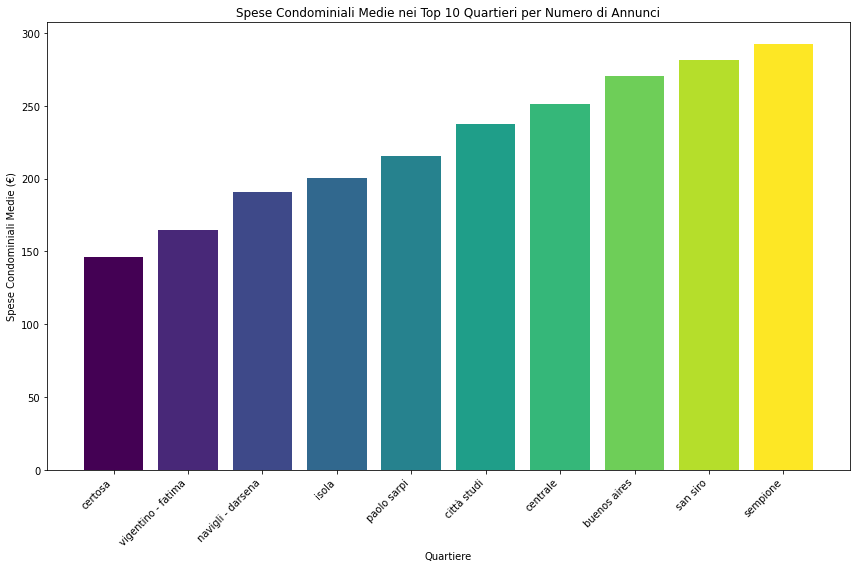

In [38]:
dati['condominium_expenses'] = pd.to_numeric(dati['condominium_expenses'], errors='coerce')

quartieri_stats = dati.groupby('neighborhood').agg(
    numero_annunci=('neighborhood', 'count'),
    spese_condominiali_medie=('condominium_expenses', 'mean')
).reset_index()

top10_quartieri = quartieri_stats.sort_values(by='numero_annunci', ascending=False).head(10)

top10_quartieri = top10_quartieri.sort_values(by='spese_condominiali_medie')

plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, 10))
plt.bar(top10_quartieri['neighborhood'], top10_quartieri['spese_condominiali_medie'], color=colors)
plt.title('Spese Condominiali Medie nei Top 10 Quartieri per Numero di Annunci')
plt.xlabel('Quartiere')
plt.ylabel('Spese Condominiali Medie (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# COSTO MEDIO AL METRO QUADRO TOP 10 QUARTERI

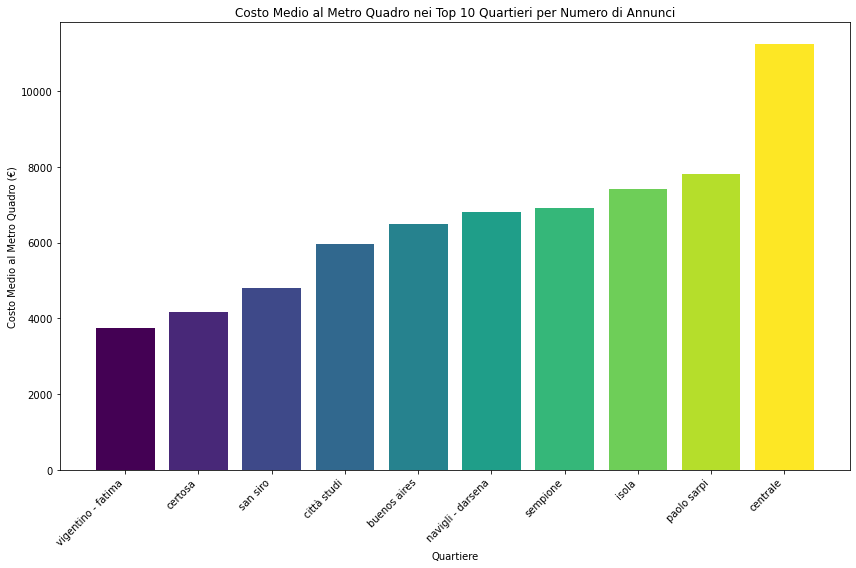

In [41]:
dati['costo_medio_mq'] = dati['price'] / dati['m2']

quartieri_stats = dati.groupby('neighborhood').agg(
    numero_annunci=('neighborhood', 'count'),
    costo_medio_mq=('costo_medio_mq', 'mean')
).reset_index()

top10_quartieri = quartieri_stats.nlargest(10, 'numero_annunci')

top10_quartieri_ordinati = top10_quartieri.sort_values(by='costo_medio_mq', ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, 10))

plt.figure(figsize=(12, 8))
plt.bar(top10_quartieri_ordinati['neighborhood'], top10_quartieri_ordinati['costo_medio_mq'], color=colors)
plt.title('Costo Medio al Metro Quadro nei Top 10 Quartieri per Numero di Annunci')
plt.xlabel('Quartiere')
plt.ylabel('Costo Medio al Metro Quadro (€)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()